In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files

uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
# Load dataset

data = pd.read_csv("Mall_Customers.csv")

# Show first 5 rows
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check info

data.info()

# Check missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
# Select features for clustering

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
# Scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


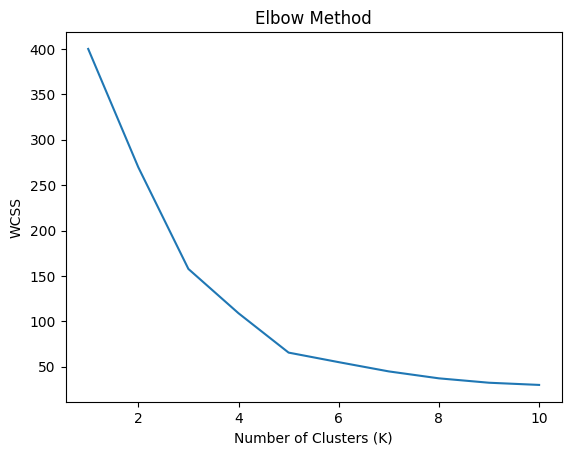

In [7]:
# Elbow Method

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [8]:
# Apply KMeans with K=5

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset

data['Cluster'] = clusters

data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


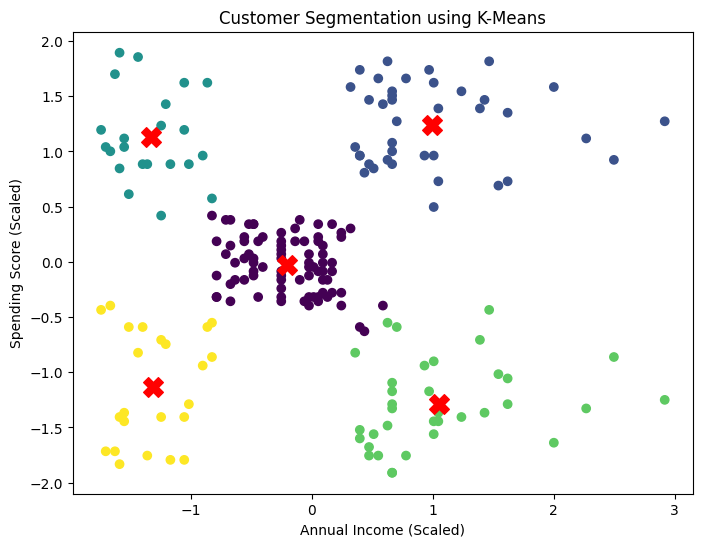

In [9]:
# Visualize the clusters

plt.figure(figsize=(8,6))

plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=data['Cluster'],
    cmap='viridis'
)

# Plot centroids
centers = kmeans.cluster_centers_

plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    s=200,
    marker='X'
)

plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Customer Segmentation using K-Means')
plt.show()


In [11]:
# Analyze clusters (only numeric columns)

data.groupby('Cluster').mean(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043
